In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# there are no categorical variables. each feature is a number. Regression problem. 
# Given the set of values for features, we have to predict the quality of wine.
# finding correlation of each feature with our target variable - quality
correlations = df.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


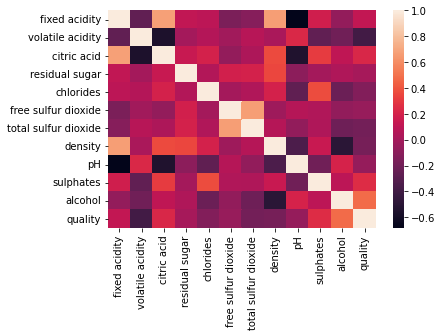

In [6]:
sns.heatmap(df.corr())
plt.show()

In [7]:
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

In [8]:
# taking features with correlation more than 0.05 as input x and quality as target variable y
features = get_features(0.05)
print(features)
x = df[features]
y = df['quality']

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [9]:
x

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [10]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)

In [12]:
# x_train.shape
# x_test.shape
# y_train.shape
y_test.shape

(400,)

In [13]:
# fitting linear regression to training data
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [14]:
# this gives the coefficients of the 10 features selected above. 
regressor.coef_

array([ 0.01773723, -0.99256049, -0.13962865, -1.59094279,  0.00559652,
       -0.00351973,  0.76859036, -0.43741414,  0.81288805,  0.30148385])

In [15]:
train_pred = regressor.predict(x_train)
train_pred

array([5.33777144, 5.33826411, 5.9503318 , ..., 6.3903182 , 6.19979375,
       5.27597259])

In [16]:
test_pred = regressor.predict(x_test)
test_pred

array([5.10801475, 5.65933623, 5.90407267, 6.13461179, 5.00611866,
       5.44514691, 5.05735245, 6.15497513, 5.51919603, 5.77259374,
       5.61809366, 5.23616173, 5.23544213, 5.31968644, 6.47007277,
       5.043404  , 5.85287121, 5.19427909, 6.07727089, 6.34949018,
       6.42525555, 5.51221957, 5.8030796 , 4.93637817, 5.16618356,
       5.48255293, 5.13758624, 6.60000969, 5.88754763, 5.74133915,
       6.09716961, 6.29379754, 4.91269821, 5.88611904, 5.11007273,
       5.94574773, 6.80685536, 5.04305653, 5.25438683, 5.88611904,
       5.17406542, 4.84008442, 6.48781656, 5.40521715, 5.31105571,
       5.84484462, 5.7100681 , 5.24300809, 5.25021217, 5.46398911,
       5.08740494, 5.61369555, 6.01375792, 6.32497377, 5.47511954,
       5.36466869, 5.09234555, 4.92625623, 5.21415941, 5.08274744,
       4.79570013, 5.4377645 , 5.25237771, 5.68830391, 5.85145609,
       6.52420079, 5.38691412, 5.71775637, 5.17641417, 5.99156845,
       5.6445189 , 5.60892012, 5.74967567, 5.21702288, 5.97975

In [19]:
train_rmse = mean_squared_error(train_pred, y_train) ** 0.5
train_rmse

0.6525240995947054

In [20]:
test_rmse = mean_squared_error(test_pred, y_test) ** 0.5
test_rmse

0.6275381539230979

In [21]:
# The root-mean-square error (RMSE) is a frequently used measure of the differences between values (sample and population values) predicted by a model and the values actually observed. 
# The RMSE for your training and your test sets should be very similar if you have built a good model. 
# If the RMSE for the test set is much higher than that of the training set, it is likely that you've badly over fit the data

In [22]:
# rounding off the predicted values for test set
predicted_data = np.round_(test_pred)
predicted_data

array([5., 6., 6., 6., 5., 5., 5., 6., 6., 6., 6., 5., 5., 5., 6., 5., 6.,
       5., 6., 6., 6., 6., 6., 5., 5., 5., 5., 7., 6., 6., 6., 6., 5., 6.,
       5., 6., 7., 5., 5., 6., 5., 5., 6., 5., 5., 6., 6., 5., 5., 5., 5.,
       6., 6., 6., 5., 5., 5., 5., 5., 5., 5., 5., 5., 6., 6., 7., 5., 6.,
       5., 6., 6., 6., 6., 5., 6., 6., 5., 6., 6., 6., 6., 5., 5., 6., 6.,
       5., 5., 6., 6., 6., 6., 6., 6., 5., 5., 5., 5., 5., 5., 7., 6., 6.,
       6., 6., 6., 5., 5., 5., 5., 6., 6., 5., 6., 6., 5., 5., 5., 5., 6.,
       6., 6., 5., 5., 5., 6., 6., 6., 6., 5., 5., 5., 5., 6., 6., 7., 6.,
       6., 6., 5., 5., 6., 7., 5., 5., 6., 5., 6., 6., 7., 5., 5., 5., 6.,
       5., 5., 6., 6., 5., 5., 6., 6., 6., 6., 6., 6., 5., 6., 5., 5., 6.,
       6., 7., 5., 6., 6., 5., 6., 6., 5., 6., 7., 5., 6., 6., 6., 6., 6.,
       5., 6., 6., 6., 7., 5., 5., 5., 5., 5., 6., 6., 5., 5., 5., 6., 6.,
       5., 6., 5., 6., 5., 5., 6., 6., 6., 6., 6., 6., 6., 5., 5., 5., 5.,
       5., 6., 5., 6., 5.

In [23]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

Mean Absolute Error: 0.4844340755984715
Mean Squared Error: 0.3938041346292097
Root Mean Squared Error: 0.6275381539230979


In [24]:
coeffecients = pd.DataFrame(regressor.coef_,features)
coeffecients.columns = ['Coeffecient']
coeffecients
#These numbers mean that holding all other features fixed, a 1 unit increase in suplhates will lead to an increase of 0.8 in Quality of wine, and similarly for the other features
#These numbers mean that holding all other features fixed, a 1 unit increase in volatile acidity will lead to a decrease of 0.99 in Quality of wine, and similarly for the other features

,Coeffecient
fixed acidity,0.017737
volatile acidity,-0.992560
citric acid,-0.139629
chlorides,-1.590943
free sulfur dioxide,0.005597
total sulfur dioxide,-0.003520
density,0.768590
pH,-0.437414
sulphates,0.812888
alcohol,0.301484
